In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
def my_function(x):
    y = -x**3 + 10*x**2
    return y

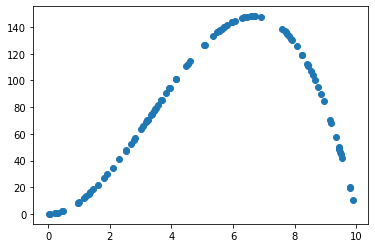

In [3]:
x_train = np.random.uniform(low=0, high=10, size=100)
y_train =  my_function(x_train) 
y_train = y_train.T
x_test = np.random.uniform(low=0, high=10, size=10)
y_test =  my_function(x_test)
plt.scatter(x_train,y_train.T)


Let's try a simple exaple. I try data without the error term. <br/>
Suppose the kernel is defined by 
$$ \theta_1 exp( -  \frac{(x-x')^2}{\theta_2}) + \theta_3 \delta(x,x')$$
where$$\delta(x,x')= 1 \quad x=x' $$
$$\quad \delta(x,x')= 0  \quad otherwise$$
<br/>


Thetas could be optimized by SCG (still in progress). <br/>
In this example, I assign random values.

In [7]:
def kernel(x1,x2,theta1=1,theta2=.3, theta3=.2):
    if x1==x2:
        delta=1
    else:
        delta=0
    k = theta1 * np.exp(- (x1-x2)**2/ theta2) + theta3 * delta
    return k
    

In [5]:
N=len(y_train)
M=len(y_test)
K=np.zeros((N,N))
k=np.zeros((1,N)).reshape(1,-1)
mu=np.zeros((M))
var=np.zeros((M))
for n in range(N):
    for n2 in range(N):
        K[n,n2] = kernel(x_train[n],x_train[n2])
yy = np.dot(inv(K), y_train )# N by 1 

for m in range(M):
    for n in range(N):
        k[:,n] = kernel(x_train[n],x_test[m])
    s = kernel(x_test[m],x_test[m])
    mu[m] = k.dot(yy)
    var[m] = s - np.dot(np.dot(k,inv(K)),k.T)


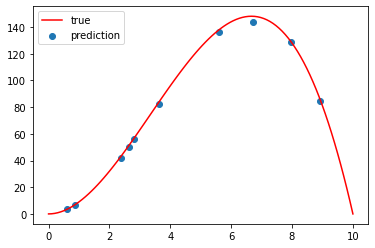

In [6]:
x=np.linspace(0, 10, 100)
y=my_function(x)
plt.plot(x,y, label="true",color="red")
plt.legend()
plt.scatter(x_test,mu, label="prediction")
plt.legend()